## Carregamento e análise dos dados

### Load do Dataset que vai servir de base para nosso treinamento

In [1]:
from tensorflow import keras

# Definição do nosso Dataset com as informações da base de dados do keras
dataset = keras.datasets.fashion_mnist

# dataset.load_data() => retorna um conjunto de duas tuplas com as informações de treino e teste
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

### Formato dos nossos dados

In [2]:
display(imagens_treino.shape)
display(imagens_teste.shape)

(60000, 28, 28)

(10000, 28, 28)

In [3]:
display(identificacoes_treino.shape)
display(identificacoes_teste.shape)

(60000,)

(10000,)

### Exibição de exemplos do nosso Dataset

Text(0.5, 1.0, '9')

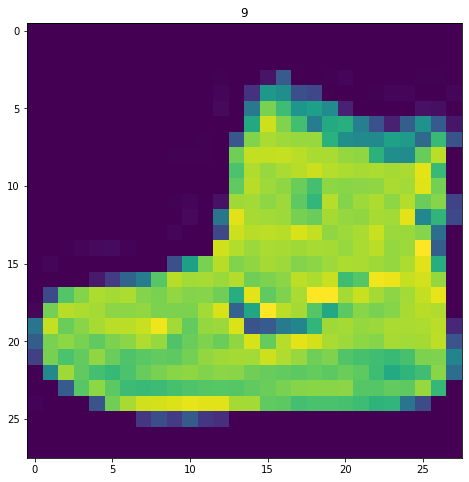

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

# Função da Lib para exibir imagens => passando o index de onde a imagem está
plt.imshow(imagens_treino[0])

# Função para colocar titulo no gráfico => passando o index da identificação do nosso treino
plt.title(identificacoes_treino[0])

In [5]:
display(identificacoes_treino.min())
display(identificacoes_treino.max())
total_classificacoes = 10
print(f"Total de classificações: {total_classificacoes}")

0

9

Total de classificações: 10


### Escala de cor na imagem
 - Futuramente será feita uma redução para evitar "loss"

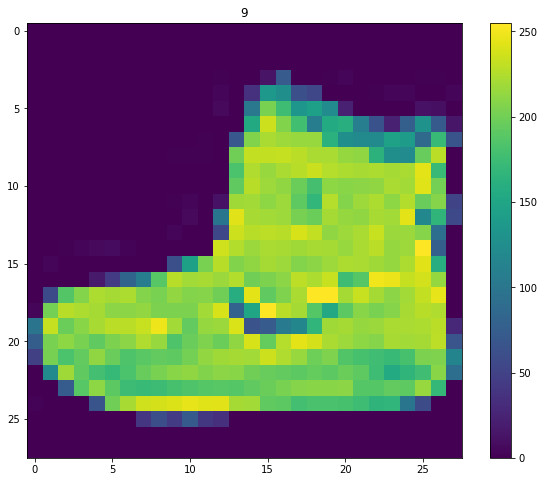

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
plt.colorbar()

### Exemplos de classificações dentro do Dataset

In [7]:
# Mapeamento dos nomes de cada classificação com base no Github oficial
nomes_classificacoes = ["Camiseta", "Calça", " Pullover", 
                        "Vestido", "Casaco", "Sandalha", 
                        "Camisa", "Tenis", "Bolsa", "Bota"]

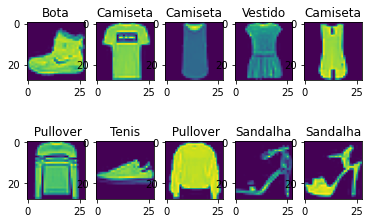

In [8]:
for imagem in range(10):
    # Função do subplot serve para mostrar diversas imagens dentro de um "for"
    # Passando o número de linhas, o número de colunas e a quantidade de repetição
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    # nomes_classificacoes[identificacoes_treino[imagem]] => identificacoes_treino[imagem] retorna um número com a posição no
    # vetor de mapeamento para mostrar bonitinho nos gráficos
    plt.title(nomes_classificacoes[identificacoes_treino[imagem]])

## Construção do modelo
   - Modelo:
    - Entrada
    - Processamento
    - Saída

In [9]:
import tensorflow

# Normalização
# Escalonamento para reduzir o "loss"
# Divisão da escala de cor da imagem para ficar entre 0 e 1
imagens_treino = imagens_treino/255.0

# Sequencia de passos do modelo
model = keras.Sequential([
    # Entrada
    # Definição dos layers com o achatamento das nossas duas dimensões de para uma dimensão só
    keras.layers.Flatten(input_shape=(28, 28)), # Camada 0
    
    # Processamento
    # Número de "bolinhas" da camada e metodologia de ativação
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # Camada Densa, conectividade com todas as outras "bolinhas"
    
    # Adormecer camadas para evitar o vício
    keras.layers.Dropout(0.2), # Convenção de 20% dos neuronios dormindo
    
    # Camadas Ocultas
    # Teste de possíveis camadas intermediárias para verificar resultados diferentes
#     keras.layers.Dense(128, activation=tensorflow.nn.relu),
     keras.layers.Dense(64, activation=tensorflow.nn.relu),
     keras.layers.Dropout(0.2),
#     keras.layers.Dense(32, activation=tensorflow.nn.relu),
    
    # Saída
    # Número de "bolinhas" é igual ao número de classificações que nós temos e a ativação
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

# É preciso compilar o modelo antes de treinar/testar
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo => passando o x, y e número de ciclos de treino que devem ser realizados
# Argumento para fazer validação no fit
historico = model.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7454 - accuracy: 0.7319 - val_loss: 0.4009 - val_accuracy: 0.8546
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4420 - accuracy: 0.8404 - val_loss: 0.3877 - val_accuracy: 0.8563
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3930 - accuracy: 0.8595 - val_loss: 0.3511 - val_accuracy: 0.8712
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3674 - accuracy: 0.8672 - val_loss: 0.3488 - val_accuracy: 0.8730
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3534 - accuracy: 0.8709 - val_loss: 0.3389 - val_accuracy: 0.8786


### Salvando e carregando o modelo

In [10]:
from tensorflow.keras.models import load_model

# Método para salvar o modelo
model.save("modelo.h5")

# Método para carregar o modelo
modelo_salvo = load_model("modelo.h5")

## Analisando o resultado do treinamento e validação

{'loss': [0.5749123096466064,
  0.4273841977119446,
  0.3904077112674713,
  0.3657076060771942,
  0.35096195340156555],
 'accuracy': [0.7937291860580444,
  0.8457499742507935,
  0.8582291603088379,
  0.8662708401679993,
  0.871749997138977],
 'val_loss': [0.4008869528770447,
  0.3877495527267456,
  0.35108572244644165,
  0.34875017404556274,
  0.33892548084259033],
 'val_accuracy': [0.8545833230018616,
  0.856333315372467,
  0.8711666464805603,
  0.8730000257492065,
  0.8785833120346069]}

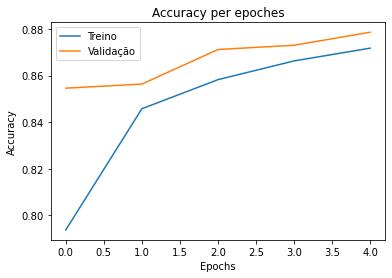

In [11]:
# Retorna um dicionário com todas as métricas do fit
display(historico.history)

# Maneira de acessar as informações dentro do dicionário
val_acc = historico.history['val_accuracy']
acc = historico.history['accuracy']
val_loss = historico.history['val_loss']
loss = historico.history['loss']

plt.plot(acc)
plt.plot(val_acc)
plt.title("Accuracy per epoches")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Treino", "Validação"])

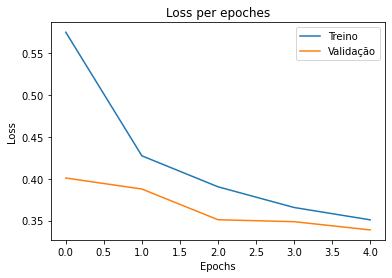

In [12]:
plt.plot(loss)
plt.plot(val_loss)
plt.title("Loss per epoches")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Treino", "Validação"])

## Validação dos dados

In [14]:
import numpy as np

imagens_teste = imagens_teste/255.0

# Avaliação do modelo
# Retorna o "loss" e a accuracy do modelo
display(model.evaluate(imagens_teste, identificacoes_teste))

# Avaliação modelo salvo
display(modelo_salvo.evaluate(imagens_teste, identificacoes_teste))

313/313 [==============================] - 0s 1ms/step - loss: 5.1760 - accuracy: 0.1000


[5.176011562347412, 0.10000000149011612]

313/313 [==============================] - 0s 957us/step - loss: 5.1760 - accuracy: 0.1000


[5.176011562347412, 0.10000000149011612]